In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight')

Skipping, found downloaded files in "./male-female-height-and-weight" (use force=True to force download)


In [ ]:
data = pd.read_csv('/content/male-female-height-and-weight/Test set.csv')

In [ ]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [ ]:
data.loc[data['Sex'] == 'Male', 'Sex'] = 1
data.loc[data['Sex'] == 'Female', 'Sex'] = 0

In [ ]:
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [ ]:
X = data[['Height', 'Weight']]
y = data['Sex']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns = ['Height', 'Weight'])

In [ ]:
X.head()

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


In [ ]:
y.head()

,Sex
0,0
1,1
2,1
3,1
4,0


In [ ]:
y = y.astype('int')

In [ ]:
y.dtype

dtype('int64')

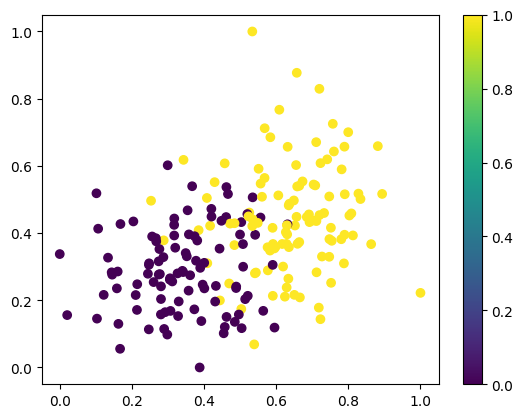

In [ ]:
plt.scatter(X['Height'], X['Weight'], c=y)
plt.colorbar()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((164, 2), (41, 2))

In [ ]:
data.shape

(205, 3)

# Model Building

In [ ]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu', input_shape = (2,)),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

# compile model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.005),
              metrics = ['accuracy'])

# train model
epoch_number = 20
history = model.fit(X_train, y_train, epochs = epoch_number)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.5857 - loss: 0.6881
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5695 - loss: 0.6543 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6664 - loss: 0.6279 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7682 - loss: 0.5961 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7762 - loss: 0.5414
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8161 - loss: 0.4785 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8403 - loss: 0.4107
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8448 - loss: 0.3552 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8709 - loss: 0.3113
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8684 - loss: 0.2780
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8607 - loss: 0.2750
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8662 - loss: 0.2533
Epoch 1

In [ ]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,800 (14.85 KB)

 Trainable params: 1,266 (4.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,534 (9.90 KB)

# Model Evaluate

In [ ]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 375ms/step - accuracy: 0.9141 - loss: 0.2669


[0.2798917293548584, 0.9024389982223511]

In [ ]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 324ms/step


In [ ]:
y_pred[:5]

array([[0.83797354, 0.1620265 ],
       [0.02166388, 0.9783361 ],
       [0.00835132, 0.9916487 ],
       [0.7951563 , 0.2048437 ],
       [0.01822   , 0.98178   ]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis = 1)
y_pred[:5]

array([0, 1, 1, 0, 1])

In [ ]:
y_test[:5]

,Sex
15,0
9,1
100,1
132,0
68,1


In [ ]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test, y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8636363744735718>

In [ ]:
# Recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test, y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.949999988079071>

<Axes: >

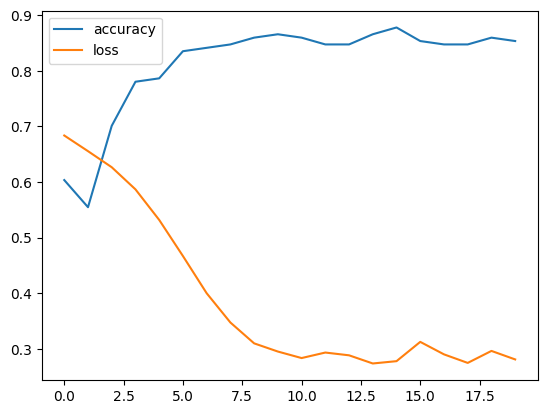

In [ ]:
pd.DataFrame(history.history).plot()